In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy as sp
import matplotlib as mp
from datetime import datetime
import math
from tabulate import tabulate
import time
import functions

pd.options.mode.chained_assignment = None

In [2]:
steam = pd.read_csv(r"C:\Users\edo98\OneDrive\Desktop\Science Stuff\archive\steam_reviews.csv")

[RQ1]
- Exploratory data analysis

The first thing we did with our data set was understanding its structure and what each column was describing. 

In [3]:
steam.head(10)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
7,7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,1611378312,1611378312,True,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,1.609671e+09
8,8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,1611377703,1611377703,True,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,1.611317e+09
9,9,292030,The Witcher 3: Wild Hunt,85182785,spanish,great game,1611377005,1611377005,True,0,...,True,False,False,76561198301724112,38,5,2399.0,333.0,2364.0,1.611379e+09


We also checked what kind of objects we were dealing with. This came in handy for a lot of the stuff we did afterwards.

In [4]:
steam.dtypes 

Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny                         int64
weighted_vote_score               float64
comment_count                       int64
steam_purchase                       bool
received_for_free                    bool
written_during_early_access          bool
author.steamid                      int64
author.num_games_owned              int64
author.num_reviews                  int64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object

We wanted to find out if we were dealing with some missing values: thankfully the only values missing were from the actual corpus of the review, from the author's playtime (which probably means the author reviewed the app without ever launching it), and just two rows from columns related to the author's playtime, which weren't pertinent to our analysis.

In [5]:
steam.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

We also decided to drop some columns that weren't pertinent to our analysis.

In [6]:
steam.drop(['review', 'written_during_early_access', 'author.playtime_forever', 'author.playtime_last_two_weeks', 
'author.playtime_at_review', 'author.last_played'], axis=1)

,Unnamed: 0,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,author.steamid,author.num_games_owned,author.num_reviews
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,1611381629,1611381629,True,0,0,0.000000,0,True,False,76561199095369542,6,2
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,1611381030,1611381030,True,0,0,0.000000,0,True,False,76561198949504115,30,10
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,1611380800,1611380800,True,0,0,0.000000,0,True,False,76561199090098988,5,1
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,1611379970,1611379970,True,0,0,0.000000,0,True,False,76561199054755373,5,3
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,1611379427,1611379427,True,0,0,0.000000,0,True,False,76561199028326951,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,1584986704,1584986704,True,0,0,0.000000,0,True,False,76561197967033932,431,7
21747367,21747372,546560,Half-Life: Alyx,65645115,english,1584986693,1584986693,True,0,0,0.000000,0,False,False,76561198046495482,70,10
21747368,21747373,546560,Half-Life: Alyx,65645100,english,1584986673,1584986673,True,0,0,0.474138,0,True,False,76561198176379749,79,17
21747369,21747374,546560,Half-Life: Alyx,65645066,english,1584986631,1586382422,True,0,0,0.386022,11,True,False,76561198041763187,140,3


We chose to use a plot to gain some interesting insights about our dataset, which helped us understanding it better.

<AxesSubplot:xlabel='user', ylabel='Nr. of reviews'>

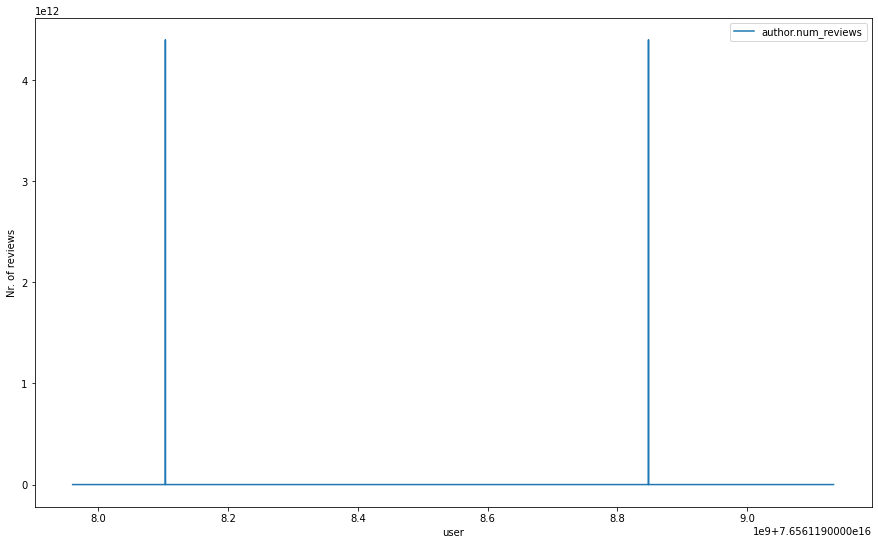

In [57]:
nr_reviews_distro = steam.groupby('author.steamid')[['author.num_reviews']].max()
nr_reviews_distro.plot(figsize = (15, 9), label = '', ylabel = 'Nr. of reviews', xlabel = 'user')

Here we plotted the number of reviews for each author in the dataset. Even if it's not the most readable, we can notice that, as expected, most authors don't write *too many* reviews, while a few outliers definetely outperform the others by a large margin.

##

**After having done these passages, we are now ready to move on to our analysis**

--------

[RQ2]
- Plot the number of reviews for each application in descending order

We decided to plot the first 50 applications by number of reviews. This solution serves a double purpose, since plotting more than 300 applications would have made the histogram unreadable, and also because, as a store, Steam seems to have a relatively small number of incredibly successful (and thus reviewed) applications, followed by a much bigger number of applications with a smaller following. As a testament to this consideration, we can in fact see that in this dataframe, which contains more than 21 million reviews over about 300 applications, only 47 applications have a review count higher than one-hundred-thousand.

<AxesSubplot:title={'center':'Games'}, xlabel="App's name", ylabel='Number of reviews (in millions)'>

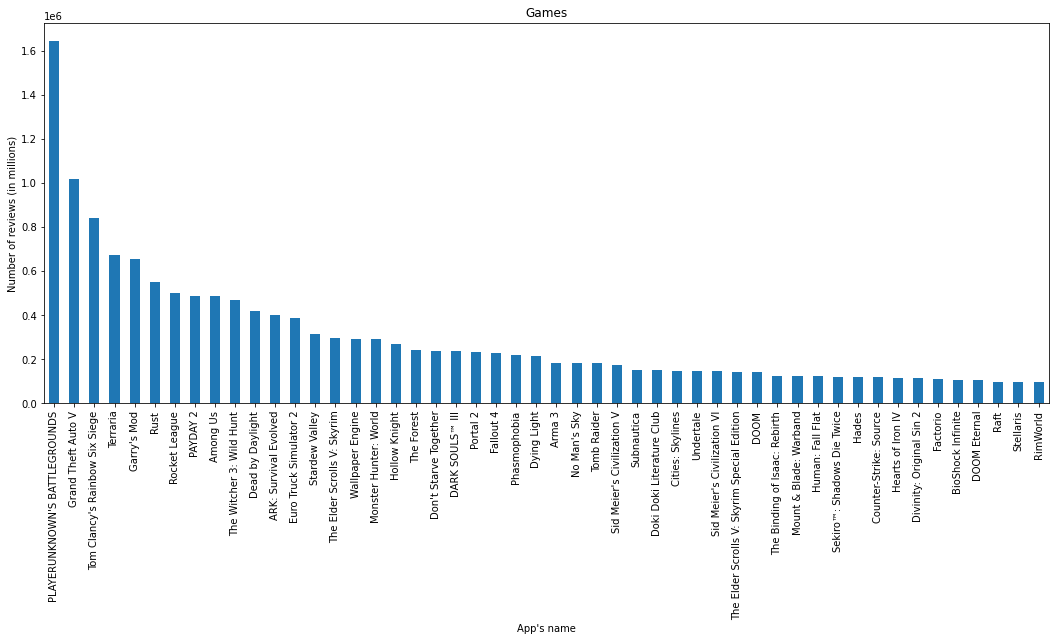

In [8]:
total_reviews = steam.groupby('app_name').review_id.count().sort_values(ascending=False)
total_reviews.head(50).plot.bar(figsize = (18, 7), title = 'Games', xlabel = "App's name", ylabel = 'Number of reviews (in millions)') 

It's easy to see how PLAYERUNKNOWN'S BATTLEGROUND is leading the review count with more than one and a half million reviews, followed by Grand Theft Auto V at around a million reviews, while DOOM Eternal is the last application in this dataset with more than 100k reviews. 

An interesting consideration is that, while many of these very popular apps were made by well-established studios and had a massive budget, there are a lot of apps in this top 50 that were made by small, independent studios, such as Terraria, Among Us or Hollow Knight. If we consider the number of reviews as one of the possible measures of success for an application, we could argue that the money spent on developing the app isn't always correlated with said app's success.

[RQ2]:
- What applications have the best Weighted Vote Score?

From what we understand, the values contained in the column "Weighted Vote Score" refer to the score assigned to a given review, based on the amount of "helpful" vote said review receives from other users.

With this information in mind, we found out that many apps have reviews made about them with a very high Weighted Vote Score (close to 1). In the cell below, you'll find a plot of the best performers in this regard.

<AxesSubplot:xlabel="App's name", ylabel='Review with the best weighted vote score'>

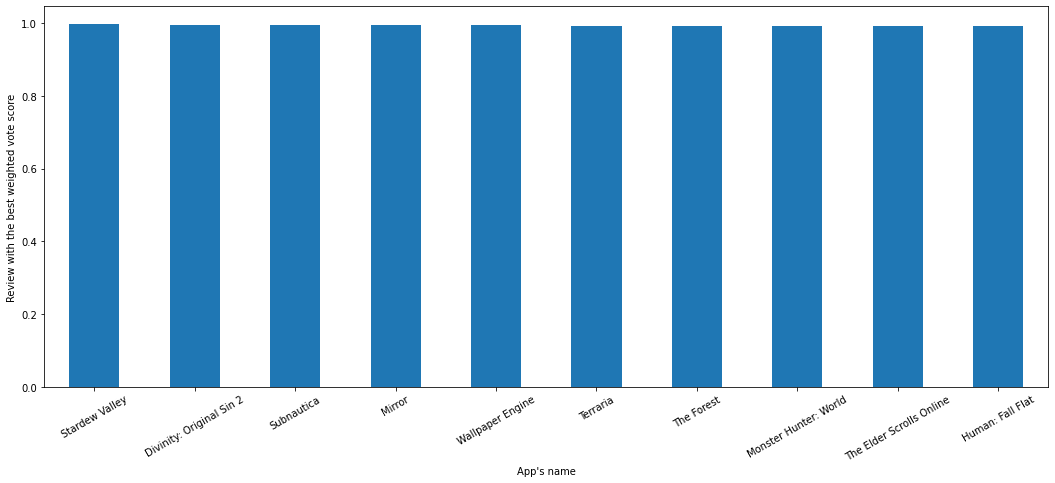

In [9]:
steam.groupby('app_name').weighted_vote_score.max().sort_values(ascending=False).head(10).plot.bar(figsize = (18, 7) ,rot = 30,
ylabel = "Review with the best weighted vote score", xlabel = "App's name" )

[RQ2]:
- Which applications have the most and the least recommendations?

Not many surprises here: the apps with the biggest amount of reviews are also those that (usually) receive the most amount of positive and negative reviews. PLAYERUNKNOWN'S BATTLEGROUND seems to be a very divisive one, given that it's by far the app with the most review, but less than 55% of its reviewers recommend it. The second most reviewed app, Grand Theft Auto V, has a much more flattering ratio, with 81% of positive reviews.
It's also interesting to see that three episodes of the popular NBA 2K serie (in particular, NBA 2K18, NBA 2K19 and NBA 2K21) are between the games with the most negative reviews, while not figuring both in the apps with the most reviews and and in those with the most positive reviews.

<AxesSubplot:title={'center':'Games with the most positive reviews'}, xlabel="App's name", ylabel='Number of positive reviews'>

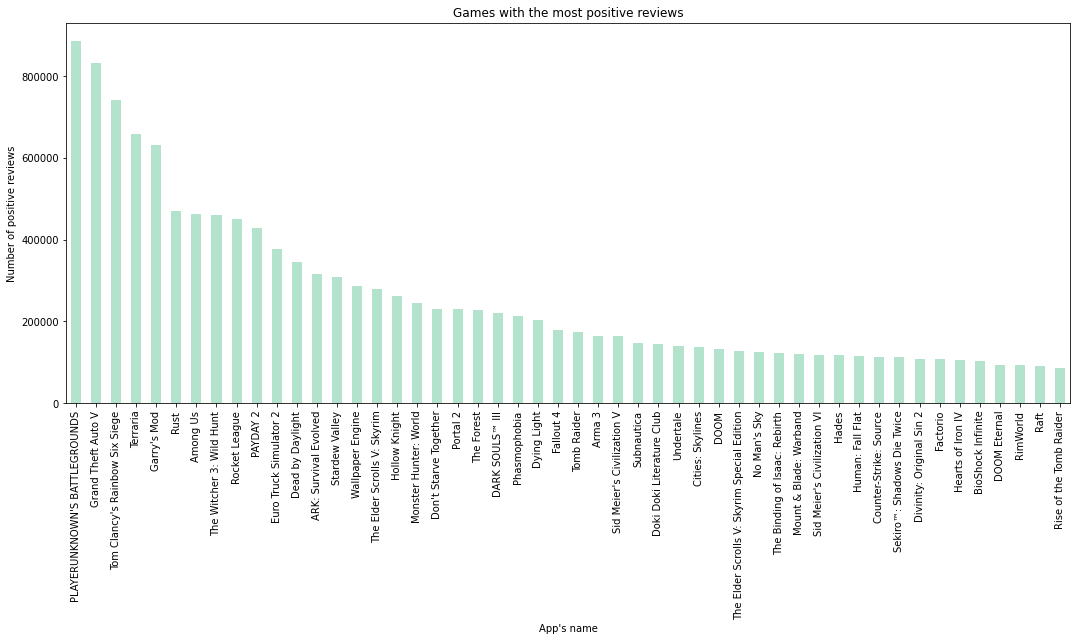

In [10]:
functions.positive_reviews(steam)

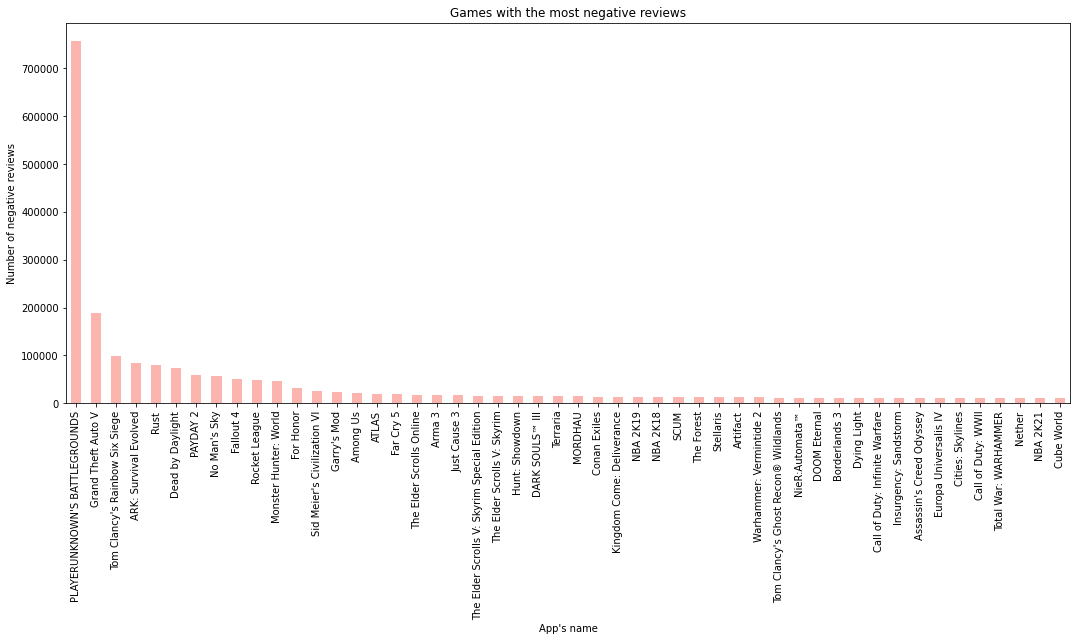

In [11]:
functions.negative_reviews(steam)

[RQ2]:
- How many of these applications were purchased, and how many were given for free?

This question was somewhat tricky to answer due to the nature of the data collected. We first tried to check the ratio between applications with the value "True" under the "steam_purchase" column and those with "True" under the "received_for_free" one, but if one were to add the counts after filtering the data in such way, the result would be quite a bit lower than the dataframe's lenght.

After thinking about it, and also thanks to our experience using Steam, we realized that Steam allows to purchase applications' keys from third-party resellers and to activate said keys on Steam to access and download the products; since the column "steam_purchase" only checks if the reviewer bought an application directly on Steam, a review from a user who decided to buy the right to access the app from an external website would show a "False" under both the "steam_purchase" and the "received_for_free" columns. 

In an attempt to filter the data correctly, we decided to consider as a purchased product each product that was purchased directly on Steam, and also each product that showed a "False" under both the the "steam_purchase" and the "received_for_free" columns: we decided to assume that these applications were the ones bought from external websites.

There are also some cases of reviews for which both the "steam_purchase" and the "received_for_free" columns show "True" as a value, but we didn't really know what that would mean and we decided to exclude those from our analysis.

There is still some data missing (about 30 thousand reviews), but we felt this was still a pretty good approximation. 
Regarding the analysis, it's easy to see as the biggest part of the reviewers bought the application themselves, while those who received it for free represents only a small part of the population

([<matplotlib.patches.Wedge at 0x24bce84c100>,
 [Text(-3.653631562371761, 0.8446753260518994, 'Purchased'),
  Text(3.6536314882302987, -0.8446756467497176, 'Received for free')],
 [Text(-2.4357543749145076, 0.5631168840345997, '98.3'),
  Text(2.435754325486866, -0.563117097833145, '1.7')])

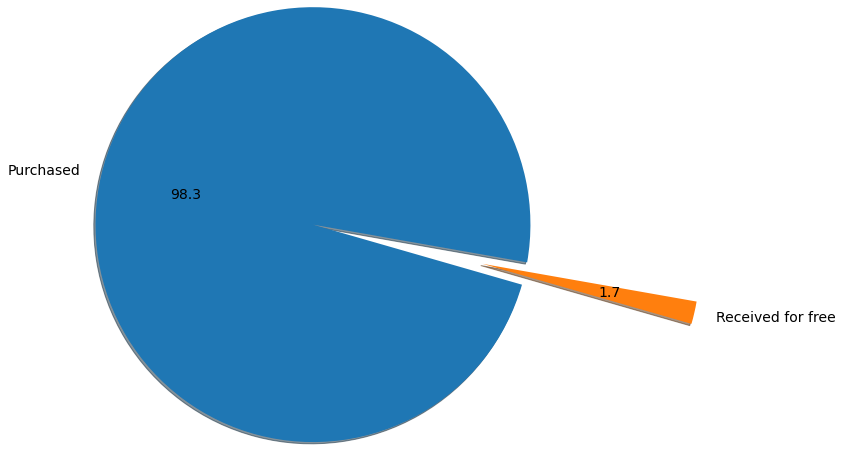

In [12]:
functions.purchased_free_ratio(steam)

--------------

[RQ3]:
- What is the most common time that authors review an application?

For the following two points we decided to only consider the 'timestamp_created' column. That is because almost 90% of the reviews don't get updated (as shown in the code below), and as such the distribution of the 'timestamp_created' and 'timestamp_updated' columns are almost identical.

You can notice we used two different methods to parse the dates in the dataset: the first one doesn't consider seconds (they are set to 0), while the second does. The reasoning is that in the first point we wanted to find the most common time users write their reviews on Steam, and as such we felt it wasn't needed to narrow it down to seconds: minutes are enough.

We use a function to check how many users decided to update their reviews. The results of this piece of code is what made us decide to only consider the "timestamp_created" column.

In [3]:
c = functions.dateparse_secs(steam['timestamp_created'])
u = functions.dateparse_secs(steam['timestamp_updated'])
functions.not_updated(steam, c, u)

The percentage of reviews that don't get updated is 88.74 %


Notice how down here we parse dates without taking seconds into consideration

In [22]:
steam['timestamp_created_nosecs'] = (functions.dateparse_nosecs(steam['timestamp_created'])).dt.time
steam.groupby('timestamp_created_nosecs').timestamp_created_nosecs.count().sort_values(ascending=False).head(1)

timestamp_created_nosecs
14:50:00    19502
Name: timestamp_created_nosecs, dtype: int64

The most common time to write a review seems to be 14:50, with 19502 reviews written at that exact minute

[RQ3]:
- Create a function that receives as a parameter a list of time intervals and returns the plot of the number of reviews for each interval
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

This part is pretty straightforward: first we apply one of our dateparser (the one that takes seconds into consideration) to the column we're interested in, and afterwards we use a function we created that accepts a list of time intervals, then calculates the amount of reviews in those intervals and plots the results.

In [23]:
steam['timestamp_created_secs'] = functions.dateparse_secs(steam['timestamp_created']).dt.time

<AxesSubplot:title={'center':'Number of reviews by time interval'}, xlabel='Time interval', ylabel='Number of reviews (in millions)'>

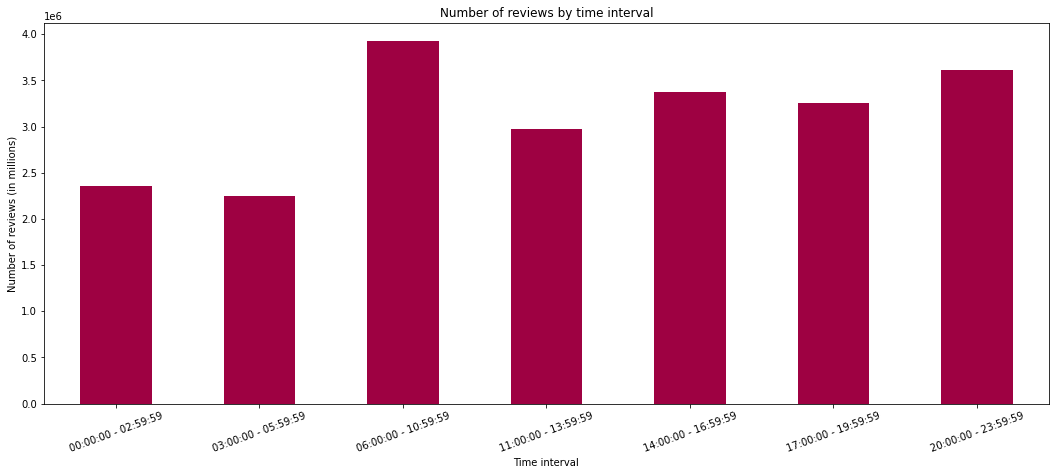

In [24]:
interval = ['00:00:00', '02:59:59', '03:00:00', '05:59:59', '06:00:00', 
'10:59:59', '11:00:00', '13:59:59', '14:00:00', '16:59:59', 
'17:00:00', '19:59:59', '20:00:00', '23:59:59']

functions.time_interval(steam, interval)

We can notice that Steam's users prefer to write their reviews in the morning (from six to eleven A.M.), and that the numbers of reviews remains almost constant from 14 to midnight, while, understandably, being much lower during the night.

---------------

**DISCLAIMER**: The next 2 RQs have been computed with chunks. The main reason that led us to choose this solution was the necessity to deal with a large amount of data with a very poor machine. Then, we also thought that the parallel simulation made by chunking is a challenging start to ponder over the matter that most of the time data are a distributed corpus that need to be treated independently, and then combined.

[RQ4]: 

- What are the top 3 languages used to review applications?


In [25]:
size = 10**5
print('The top 3 languages by number of reviews on Steam are %s' %(functions.top3(steam,size)))

The top 3 languages by number of reviews on Steam are ['english', 'schinese', 'russian']


The most prominent languages to write reviews in are English, Simplified Chinese and Russian. This isn't an unexpected result by any means, even if one could expect Spanish instead of Russian at third place; this result is probably caused by the fact that english is more widely spoken in Spanish-speaking countries than in Russia, and as such many Spanish-speaking users may prefer to write reviews in English.

[RQ4]:

- Here we use some functions we created to find out, in order:
    - The percentage of reviews done in these three languages 
    - The percentage of the reviews made in the top three languages that were voted as funny
    - The percentage of the reviews made in the top three languages that were voted as helpful



In [26]:
language_stats = functions.stats_top3(steam, size)
print("These languages comprise the %s " %(round(language_stats[0], 2)) + '% of the reviews on the platform')
print('Considering the reviews made in the aforementioned top 3 languages, %s ' %(round(language_stats[1], 2)) + \
    '% of them were voted as "helpful"') 
print('On the other hand, %s ' %(round(language_stats[2], 2)) + '% of them were voted as "funny"')

These languages comprise the 72.42 % of the reviews on the platform
Considering the reviews made in the aforementioned top 3 languages, 29.16 % of them were voted as "helpful"
On the other hand, 12.21 % of them were voted as "funny"


As expected, reviews made in English, Simplified Chinese or Russian are more than 70% of the total reviews. Almost one third of those were voted as helpful, which is actually higher than we expected, while only 12% were voted as funny, which we expected to be pretty lower than the "helpful" percentage.

---------

[RQ5]:

- Plot the top 10 most popular reviewers and the number of reviews.
- What applications did the most popular author review?
- How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
- How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

We decided to use as a measure of popularity of a reviewer the sum of the points obtained as number of comments, votes_helpful and votes_funny, multiplied by (number of reviews that they have written / 100). This measure allows us to compute a score that's both based on the perceived quality of the reviews made by an author, but also privileges reviewers who published more than 100 reviews.

AxesSubplot(0.125,0.125;0.775x0.755)


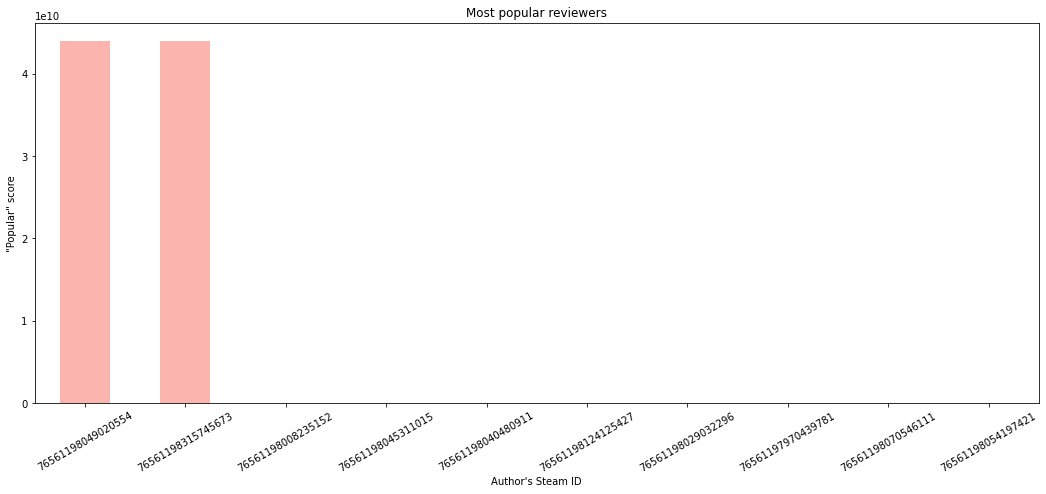

In [27]:
size = 10 ** 5
top_ten = functions.top_steamers(steam, size)
print(top_ten[1])

This is quite an interesting plot! We can see that the two top reviewers scored so high given our measure of popularity that it's not even possible to see the others on the chart: we may consider them superstars among reviewers.

Here we compute some stats associated with the most popular reviewer:

In [31]:
top_stats = functions.top_steamer_stats(steam, size, top_ten[0][0])
print('The most popular reviewer on Steam reviewed the following applications: %s' %(top_stats[0]))
print('Out of these applications, %s of them were received for free. That is the %s ' %(top_stats[1], round(top_stats[2], 2)) + '% of the application they reviewed')
print('Out of these applications, %s of them were purchased. That is the %s ' %(top_stats[3], top_stats[4]) + '% of the application they reviewed')
print('The most popular reviewer reviewed positively %s of the apps he purchased and %s of those he received for free' %(top_stats[6], top_stats[5]))
print('While he reviewed negatively %s of the apps he purchased and %s of those he received for free' %(top_stats[8], top_stats[7]))

The most popular reviewer on Steam reviewed the following applications: {'Slay the Spire', 'Sword Art Online: Fatal Bullet', 'Bloons TD 6', 'X-Blades', 'BioShock Infinite', 'The Elder Scrolls Online', 'Papers, Please', 'One Finger Death Punch', 'Portal 2', 'To the Moon', 'South Park™: The Stick of Truth™', 'Half-Life', 'Guacamelee! Super Turbo Championship Edition', 'Dishonored', 'Takedown: Red Sabre', "Sid Meier's Civilization V", 'The Elder Scrolls V: Skyrim'}
Out of these applications, 0 of them were received for free. That is the 0.0 % of the application they reviewed
Out of these applications, 4 of them were purchased. That is the 23.52941176470588 % of the application they reviewed
The most popular reviewer reviewed positively 4 of the apps he purchased and 0 of those he received for free
While he reviewed negatively 0 of the apps he purchased and 0 of those he received for free


In [ ]:
top_stats = functions.top_steamer_stats(steam, size, top_ten[0][0])

In [36]:
print('The most popular reviewer on Steam reviewed the following applications: %s' %(top_stats[0]))
print('Out of these applications, %s of them were received for free. That is the %s ' %(top_stats[1], round(top_stats[2], 2)) + '% of the application they reviewed')
print('Out of these applications, %s of them were purchased. That is the %s ' %(top_stats[3], round(top_stats[4], 2)) + '% of the application they reviewed')
print('The most popular reviewer reviewed positively %s of the apps he purchased and %s of those he received for free' %(top_stats[6], top_stats[5]))
print('While he reviewed negatively %s of the apps he purchased and %s of those he received for free' %(top_stats[8], top_stats[7]))

The most popular reviewer on Steam reviewed the following applications: {'Slay the Spire', 'Sword Art Online: Fatal Bullet', 'Bloons TD 6', 'X-Blades', 'BioShock Infinite', 'The Elder Scrolls Online', 'Papers, Please', 'One Finger Death Punch', 'Portal 2', 'To the Moon', 'South Park™: The Stick of Truth™', 'Half-Life', 'Guacamelee! Super Turbo Championship Edition', 'Dishonored', 'Takedown: Red Sabre', "Sid Meier's Civilization V", 'The Elder Scrolls V: Skyrim'}
Out of these applications, 0 of them were received for free. That is the 0.0 % of the application they reviewed
Out of these applications, 4 of them were purchased. That is the 23.53 % of the application they reviewed
The most popular reviewer reviewed positively 4 of the apps he purchased and 0 of those he received for free
While he reviewed negatively 0 of the apps he purchased and 0 of those he received for free


Our top reviewer reviewed 18 applications on Steam. Our functions tells us that none of them were received for free and only four of them were bought on Steam. This means that our top reviewer most likely bought most of his games from third party resellers and then activated said games on Steam. It's still interesting to see that he managed to score so high with only 18 reviews: he must have received a lot of votes on his reviews together with many comments.

--------

[RQ6]:
- What is the average time (days and minutes) a user lets pass before he updates a review?

Here we define some variables:

In [37]:
c = functions.dateparse_secs(steam['timestamp_created'])
u = functions.dateparse_secs(steam['timestamp_updated'])

'''
We didn't really need to define these two variables, since we already did that earlier,
but we tought it would improve the clarity of what we were doing
'''

a = steam['author.steamid']
twenty_one_milli = len(steam)

In [38]:
functions.average_time_to_update(steam, c, u, a, twenty_one_milli)

An user lets pass in average 36 days and 12790 seconds to update a review


Users seemingly let pass a little more than a month on average when updating their reviews: this could be due to the fact that many applications these days often get updated, especially a few weeks after their launch. These updates could shift a reviewer's opinion on an application, which can explain the timeframe considered to update one's review.

[RQ6]:
- Plot the top 3 authors that usually update their reviews

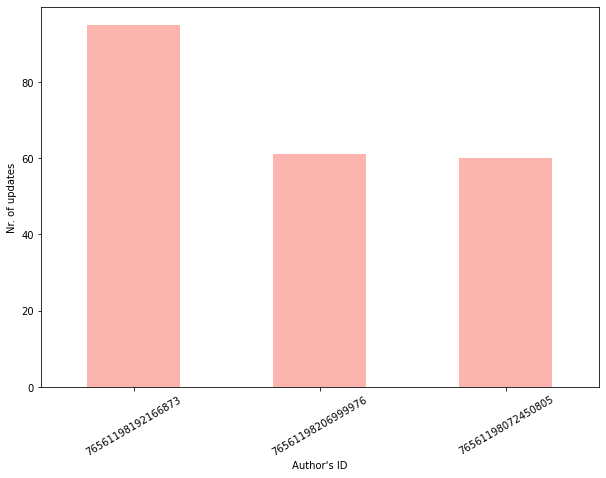

In [39]:
functions.top_three_updaters(steam, c, u, a)

While updating a review doesn't seem to be too common, some users definetely enjoy doing so: the three authors who likes to update theirs the most did so 60, 61 and a rather impressive 95 times. 

-------

[RQ7]:

- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

We compute the "probability that a review has a Weighted Vote Score equal to or bigger than 0.5" by considering the number of favorable cases divided by the number of total cases.

In [40]:
weighted_score = steam.weighted_vote_score

probability_wg = functions.prob_wg(steam, weighted_score, twenty_one_milli)
print('The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is %s' %(probability_wg[1]) + '%')

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 0.22%


[RQ7]:
- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

We compute the "probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5" using the definition of the conditional probability, so we compute the formula: (P("review has at least one vote as funny" ∩ Weighted Vote Score>0.5))/(P(Weighted Vote Score>0.5))

In [41]:
votes_funny = steam.votes_funny
probability_funny = functions.prob_fun(steam, weighted_score, votes_funny, twenty_one_milli)

print('The probability that a review has at least one vote as funny given that the Weighted Vote score is bigger than 0.5 is %s' %(probability_funny) + '%')


The probability that a review has at least one vote as funny given that the Weighted Vote score is bigger than 0.5 is 0.33%


[RQ7]:
- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

We compute the indipendence between the events "review has at least one vote as funny" and "review has a Weighted Vote Score equal or bigger than 0.5" by using the definition of independence: we checked if (P("review has at least one vote as funny" ∩ Weighted Vote Score>0.5)) was equal to the product of P("review has at least one vote as funny")*P("Weighted Vote Score>0.5)

In [42]:
ind = functions.indipendence(steam, weighted_score, votes_funny, twenty_one_milli, probability_wg[0])

if ind:
    print('The probability that "a review has at least one vote as funny" is independent from the "probability that a review has a Weighted Vote Score equal or bigger than 0.5')
else:
    print('The probability that "a review has at least one vote as funny" is not independent from the "probability that a review has a Weighted Vote Score equal or bigger than 0.5')


The probability that "a review has at least one vote as funny" is not independent from the "probability that a review has a Weighted Vote Score equal or bigger than 0.5


The results show that the two events are not independent. It is a somewhat predictable result, since a weighted vote score higher than 0.5 means that a review has a good score, and as such we could consider it of a higher-quality than average, so it could be more likely that such a review could also be voted as funny

---------------

[RQ8]:
- Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice

In [43]:
only_russian = steam[steam.language == 'russian']
only_russ_scores = only_russian['weighted_vote_score']
only_chinese = steam[(steam.language == 'schinese') | (steam.language == 'tchinese')]
only_chinese_scores = only_chinese['weighted_vote_score']

r = only_russ_scores.to_numpy()
c = only_chinese_scores.to_numpy()

sp.stats.mannwhitneyu(r, c, use_continuity=True, alternative='two-sided', axis=0, method='auto')

MannwhitneyuResult(statistic=5271662323586.5, pvalue=0.0)

We decided to use an hypothesis test to check wether there were any difference in the distribution of the Weighted Vote Scores of the reviews made in Chinese (we decided to consider both traditional and simplified chinese together) and the ones of those made in Russian. To do so, we decided to use a Mann-Whitney test which allows us to conduct an hypothesis test for samples that are not normally distributed. 

The test returns a p-value that aproximates to 0. As such, even if we would have chosen an extremely low level of significance, we reject the null-hypothesis, which means that there's a difference in the weighted vote score of reviews in Chinese vs the ones in Russian.
We feel this is a reasonable results, since it can be argued that different demographics may have different preferences and tastes regarding the applications on Steam. 

[RQ8]:
- Can you find any significant relationship between the time that a user lets pass before he updates the reviews and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice

DISCLAIMER: The following tests take into consideration values equal to zero for the variable "Time that a user lets pass before he updates a review", which represent reviews that weren't updated

In [44]:
steam['deltas'] = (steam['timestamp_updated']) - (steam['timestamp_created'])
new_df = steam[['deltas', 'weighted_vote_score']]
new_df.corr(method='pearson')

,deltas,weighted_vote_score
deltas,1.000000,0.072047
weighted_vote_score,0.072047,1.000000


We decided to use a Pearson coefficient to check the linear correlation between the time that a user lets pass before updating a review and the Weighted Vote Score associated with that review. Our results show that the coefficient has a value very close to 0 (about 0.07). With that in mind, we can safely guess that the two variables are practically uncorrelated.

<AxesSubplot:xlabel='Time deltas', ylabel='Weighted vote score'>

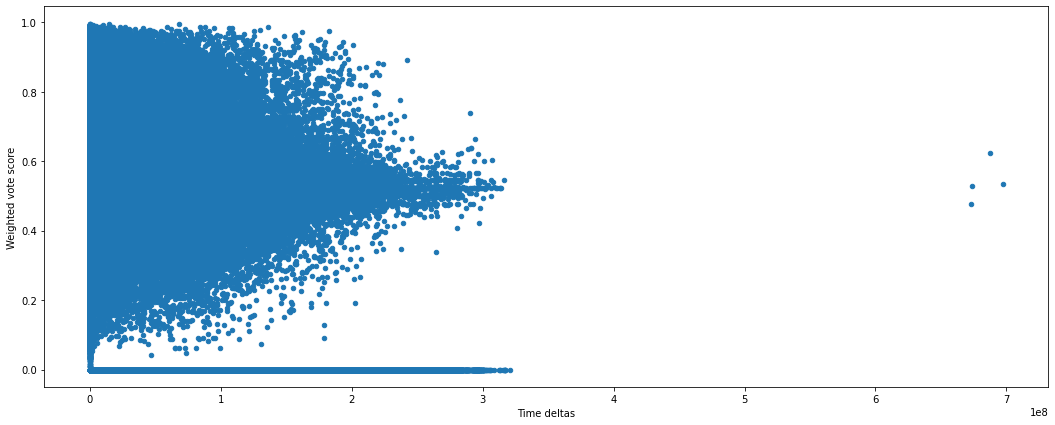

In [45]:
new_df.plot.scatter(figsize = (18, 7), x='deltas', y='weighted_vote_score', xlabel = 'Time deltas', ylabel = 'Weighted vote score', colormap = 'Spectral')

We decided to use a scatterplot to try and visualize the results. As expected, there's no clear pattern of correlation to be seen here.

[RQ8]:
- Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice

In [46]:
new_df2 = steam[steam.recommended==True]

new_df3 = new_df2[['deltas', 'weighted_vote_score']]
new_df3.corr(method='pearson')

,deltas,weighted_vote_score
deltas,1.000000,0.079483
weighted_vote_score,0.079483,1.000000


Here, we filtered the dataset to only include reviews which recommended the application. The results don't actually change that much: the Pearson coefficient between the two values is equal to 0.079.

<AxesSubplot:xlabel='Time deltas', ylabel='Weighted vote score'>

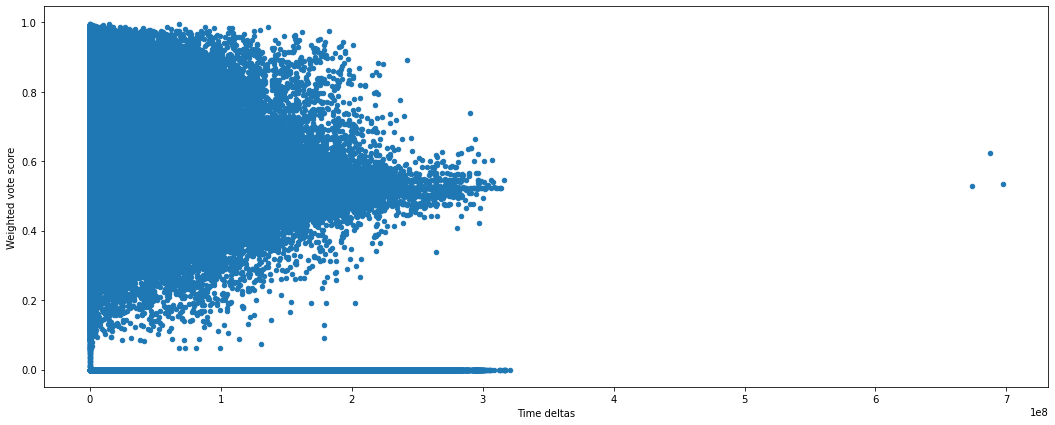

In [47]:
new_df3.plot.scatter(figsize = (18, 7), x='deltas', y='weighted_vote_score', xlabel = 'Time deltas', ylabel = 'Weighted vote score', colormap = 'Spectral')

We use once again a scatterplot to try to visualize any pattern of correlation, but again there's not a clear one to be seen.

In [48]:
new_df4 = steam[steam.recommended==False]

new_df5 = new_df4[['deltas', 'weighted_vote_score']]
new_df5.corr(method='pearson')

,deltas,weighted_vote_score
deltas,1.000000,-0.001777
weighted_vote_score,-0.001777,1.000000


While filtering for only negative reviews, the results show a Pearson coefficient of -0.00017. While this is a slight change from the other two values, it's still too close to zero to consider the presence of any correlation between the values.

<AxesSubplot:xlabel='Time deltas', ylabel='Weighted vote score'>

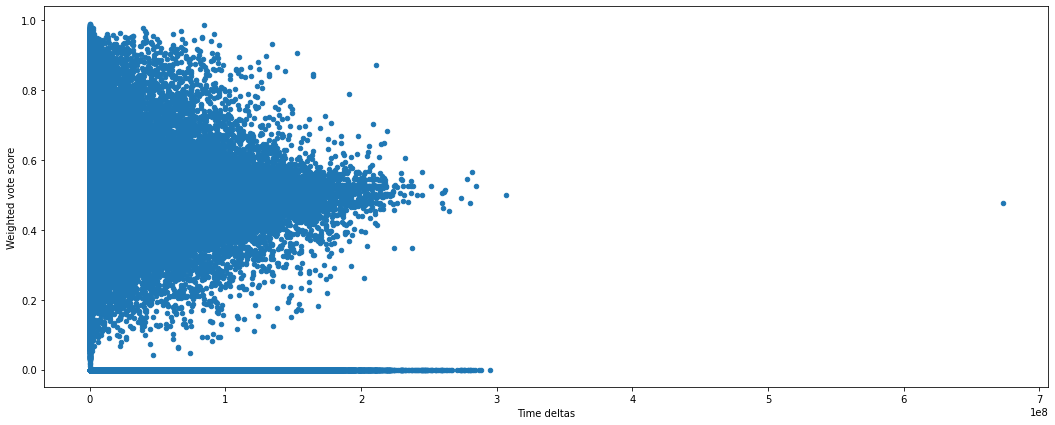

In [49]:
new_df4.plot.scatter(figsize = (18, 7), x='deltas', y='weighted_vote_score', xlabel = 'Time deltas', ylabel = 'Weighted vote score', colormap = 'Spectral')

Again, one last scatterplot to check for patterns, which, same as the others, are hard to be seen.

[RQ8]:
- What are histograms, bar plots, scatterplots and pie charts used for?

These three types of plots can offer different kinds of insights:

- Histograms are graphic representations of the frequency of different ranges of outcomes associated to some data, and can give us a rough estimate of our data's distribution. They are made out of different rectangles: the area of each rectangle represents the frequency of said range. Altough very similar in aspect, they are not to be confused with bar plots .

- Pie charts are circular-shaped charts, divided in different "slices" (thus the name). These slices are used to show the proportions between different values in the data. They are excellent to express the difference in sizes between subgroups, or to express the difference in probability between different events. While somewhat simplistic, they are immediate and simple to understand, and as such widely used. You can find an example of a pie chart in the 4th point of our [RQ2]

- The scatterplot shows relationships between two numeric variables and examines the nature of the relationship. The observed relationships can either be positive or negative, non-linear or linear. A big advantage of a  scatterplot is that it provides a clear visualization of eventual correlations. For example, in the last two [RQ8] questions we used scatterplots to show the corretional relationship between "time that a user lets pass before he updates the review" and "the Weighted Vote Score" and we could see that there is not a linear correlation between the two variables. 

[RQ8]:
- What insights can you extract from a Box Plot?

The boxplot is a graph that summarizes the min, max, median and first/third quartile.
From the boxplot we can see these statistical numbers, which are useful for obatining information about the distribution.
For example, we can see whether a distribution is symmetric or asymmetric: if the median is central then the distribution is symmetric, if the median is close to Q1 the distribution is asymmetrical to the right, if the median is close to Q3 the distribution is asymmetrical to the left.
In addition, boxplots show potential outliers of the distribution and are also useful for making comparisons between various distributions.

<AxesSubplot:>

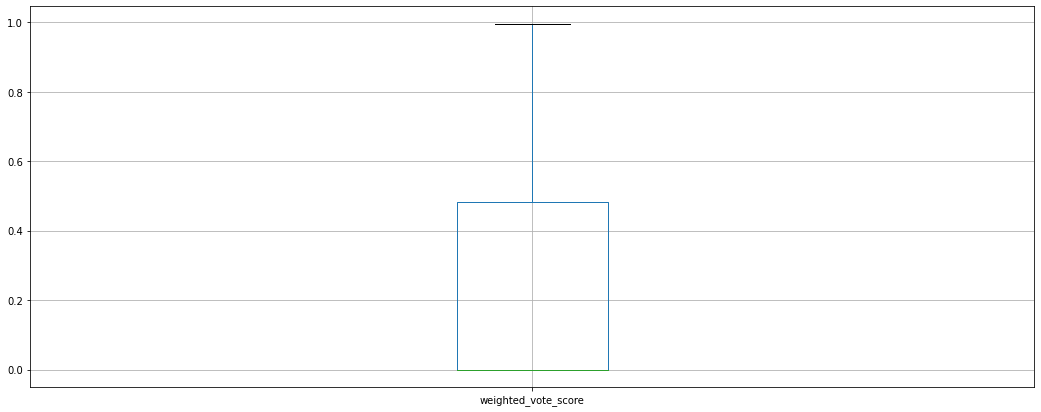

In [50]:
steam.boxplot(figsize = (18, 7), column=('weighted_vote_score'))

Here we can see an example of boxplot regarding the column "Weighted Vote Score". We can see that the median falls on the value "0" (the green line), which means that the distribution is asymmetrical to the right side.

----------------

[TQ1]:


We are given the alg(A, K) algorithm.

What does the algorithm compute? What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n? What is asymptotically the running time of the algorithm in the best case?

The algorithm takes two arguments: an array and an integer k, s.t. 1 <= k <= n. Its purpose is to find the element s in A, which partition the array in two sets L and R, so that the cardinality of set L is k. L must contain all the elements bigger than s, R the ones which are less or equal.

To perform its task, alg try to guess the right element and computes L and R to check if its guess was correct. The best case happens when alg picks the right s during the first call. This is a case which takes O(n) time since alg has to randomly pick s - which may take O(logn) - and partition the array into two sets (O(n)), then compute the length of the left set (const.). In the worst case, though, alg picks always the same value, which happens to be the max value in the array. So, even when A has repetitions, alg never stops. The complexity of an algorithm that never stops cannot be computed.


---------------

[TQ2]:

How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.) What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result. HINT: Consider the scenario where len(a) and n are numbers that are a power of 2.

(This down here is a code cell even if it was supposed to be a markdown one, but we couldn't format ir properly)

In [ ]:
function splitSwap(a, l, n):
  if n <= 1:                   #base case : constant time
    return
  splitSwap(a, l, n/2)         #recursive case : depth --> log(n)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)            #subroutine : n/2 --> O(n)

function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp

SplitSwap is a recursive algorithm which takes three arguments: a <-- array l <-- index n <-- a length It swaps the elements of a given array according to the other two parameters. Infact, starting from the index l, to the l + n position, the algo defines a subarray it will work on levereging a subroutine.

**BASE CASE**: When n <= 1 - the length of the subarray, which can be 0 <= n <= len(a). Infact, if the subarray has 1 or no element, there is nothing to swap. Nothing is performed nor returned.

**RECURSIVE CASE**: If there are at least 2 elements to be swapped, two recursive calls to the algo are performed: the subarray is split in two parts equally long (n/2). The subroutine is called for the first time after completing the (virtual) visit of one branch, so after returning from the first base case encountered. The two subarrays - the one from l to l + n/2, and the one from l+n/2 to n - are now a unique array again and the subroutine is called to work on it.

The swapping is not regular: depending on the level, a parameter - which will be called "radius" from now on - defines its logic. The radius is the length od the subarray divided by 2 (n/2). The swapped elements are symmetric with respect to the radius - which is also the center - so it means that the distance between them is the radius. The number of swapping performed is n/2 or n/2 + 1 (if the pseudo line "for i = 0 to n/2" is implemented as [0,n/2] or (0,n/2)). The height of the recursive calls tree is log(n), where the base of the logarithm function is 2, being it a binary tree.

In [51]:
#Execution example with the following implementation:

def splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, int(n/2))
  splitSwap(a, l+ int(n/2), int(n/2))
  swapList(a, l, n)
  print("a:", a, "l:", l, "n:", n)

def swapList(a, l, n):
  for i in range(0, int(n/2)):
    tmp = a[l + i]
    a[l + i] = a[l + int(n/2) + i]
    a[l + int(n/2) + i] = tmp

a = [0,1,2,3,4,5,6,7]
print("a:", a, "l:", 1, "n:", 5)
splitSwap(a, 1, 4)
print("##########################################")
a = [0,1,2,3,4,5,6,7, 8, 9, 10, 12, 13, 14, 15]
splitSwap(a, 0, 8)

a: [0, 1, 2, 3, 4, 5, 6, 7] l: 1 n: 5
a: [0, 2, 1, 3, 4, 5, 6, 7] l: 1 n: 2
a: [0, 2, 1, 4, 3, 5, 6, 7] l: 3 n: 2
a: [0, 4, 3, 2, 1, 5, 6, 7] l: 1 n: 4
##########################################
a: [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15] l: 0 n: 2
a: [1, 0, 3, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15] l: 2 n: 2
a: [3, 2, 1, 0, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15] l: 0 n: 4
a: [3, 2, 1, 0, 5, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15] l: 4 n: 2
a: [3, 2, 1, 0, 5, 4, 7, 6, 8, 9, 10, 12, 13, 14, 15] l: 6 n: 2
a: [3, 2, 1, 0, 7, 6, 5, 4, 8, 9, 10, 12, 13, 14, 15] l: 4 n: 4
a: [7, 6, 5, 4, 3, 2, 1, 0, 8, 9, 10, 12, 13, 14, 15] l: 0 n: 8


Both Master Theorem and iterative analysis show that the complexity of the algorithm is nlogn. The BigO is the same since each call is performed log(n) times to reach the end of a branch. In the image below we also show the tree relative to the first example above.

The algorithm's structure resembles the quicksort, but it doesn't order the elements of the array, since the swaps are done each time and are not controlled by an order condition. Furthermore, there is no pivot and the partitioning is done automatically, resulting in 2 equally long subarrays. It reverses the elements of the subarray and it is not optimal since for the same task - to reverse the elements of a subarray - you can use a O(n) algorithm, like the reverse() in Python library.

-----------------

[TQ3]:

- In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

    Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
    Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
    Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

    For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.



TQ3

1) Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded.

    n = 3
    W = 5
    w_i = [3, 2, 4]
    v_i = [3, 3, 10]
    x_i = [x_1, x_2, x_3]

Applying the heuristics we have that we'll consider only the objects x2 and x1 in fact we visit in increasing order of weight so [x_2, x_1,x_3]:

    budget: 2x_2 + 3x_1 <= 5 (x2,x1=1 and x3=0)
    the objective function has a maximum value: 3 + 3 = 6

But if we do not apply the heuristics we'll obtain a value of objective function bigger, so we maximize the objective function by not applying the heuristics:

    budget: 4x_3 <= 5 (x2,x1=0 and x3=1)
    the objective function has a maximum value: 10

2) Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.

    n = 3
    W = 4
    w_i = [3, 2, 2]
    v_i = [6, 4, 4]
    x_i = [x_1, x_2, x_3]

Applying the heuristics we have that we'll consider only the objects x1 in fact we visit in decreasing order of value so [x_1, x_3,x_2]:

    budget: 3x_1 <= 4
    the objective function has a maximum value: 6

But if we do not apply the heuristics we'll obtain the optimal soluzion:

    budget: 2x_2 + 2x_3 <= 4 (x_2,x_3=1, x_1=0)
    the objective function has a maximum value: 4 + 4 = 8

3) Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

    n = 3
    W = 5
    w_i = [1, 1, 5]
    v_i = [7, 7, 25]
    x_i = [x_1, x_2, x_3]
    v_i / w_i = [7, 7, 5] already ordered in decreasingly

Applying the heuristics we have that we'll consider the objects x1 and x2, in fact we visit in decreasing order of value v_i/w_i so [x_1, x_2,x_3]:

    budget: 1x_1 + 1x_2 <= 5
    the objective function has a maximum value: 7 + 7 = 14

But if we do not apply the heuristics we'll obtain the optimal soluzion:

    budget: 5x_3 <= 5
    the objective function has a maximum value: 25

